# Importing Libraries

In [1]:
import os
import time
Time_Start=time.time()
# ignore warinings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  

import numpy as np   

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
# current working directory
print(os.getcwd(),"\n")

C:\Users\divya\Documents\5810 project 



# Organizing Data Set

In [3]:
# collecting all the datasets and concatenating them to a single dataframe
datasets=[]
for dirname, _, filenames in os.walk('dataset/'):
    for filename in filenames:
        filepath=os.path.join(dirname, filename)
        print(filepath)
        datasets.append(filepath)

# creating a empty dataframe
restaurant=pd.DataFrame()

# adding all the datasets to the restaurant_data dataframe
for i in datasets:
    restaurant=pd.concat([restaurant,pd.read_csv(i)])

dataset/Restaurant reviews.csv


In [4]:
restaurant

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


# Data Cleaning

In [5]:
print("\nShape of dataset : ",restaurant.shape)
restaurant.drop_duplicates(inplace=True)
print("\nShape of dataset after removing duplicates : ",restaurant.shape)


Shape of dataset :  (10000, 7)

Shape of dataset after removing duplicates :  (9964, 7)


In [6]:
# information about dataframe 
print(restaurant.info())
print("\n\nNull values in each row  :\n\n",restaurant.isna().sum())
print("\nTotal null values in dataset  :  ",restaurant.isna().sum().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9964 non-null   object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    9964 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.8+ KB
None


Null values in each row  :

 Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

Total null values in dataset  :   17


In [7]:
# Removinging all the rows with null values
print("Shape of dataset before dropping null  :  ",restaurant.shape )
restaurant=restaurant.dropna(axis =0)

print("\nShape of dataset after dropping null   :  ",restaurant.shape ,"\n")
restaurant

Shape of dataset before dropping null  :   (9964, 7)

Shape of dataset after dropping null   :   (9955, 7) 



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [8]:
print(restaurant[restaurant.isnull().any(axis=1)].head())
#printing the data frame which are having null values or any missing values

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures]
Index: []


In [9]:
print("Rating values in dataset are : ", sorted(restaurant.Rating.unique()))

Rating values in dataset are :  ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', 'Like']


In [10]:
#restaurant_data.loc[row index,['column-names']] = value
dsc=restaurant.loc[restaurant['Rating'] == 'Like']
dsc

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [11]:
restaurant = restaurant[(restaurant['Rating'] != 'Like')]
restaurant

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [12]:
print("Features are \n",restaurant.columns)

Features are 
 Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


In [13]:
# statistics of the dataframe
print("Features are \n",restaurant.describe())

Features are 
           Pictures
count  9954.000000
mean      0.751959
std       2.575819
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      64.000000


In [14]:
restaurant["Rating"].describe() 
#description of the column rating (unique label values etc)
#there were totally 10 labels for ratings they are 5,4,1,3,2,3.5,4.5,2.5,1.5,Like

count     9954
unique       9
top          5
freq      3826
Name: Rating, dtype: object

In [15]:
print("Rating values in dataset are : ", sorted(restaurant.Rating.unique()))

Rating values in dataset are :  ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']


In [16]:
restaurant["Rating"].value_counts()

5      3826
4      2373
1      1735
3      1192
2       684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

# Data Visualization

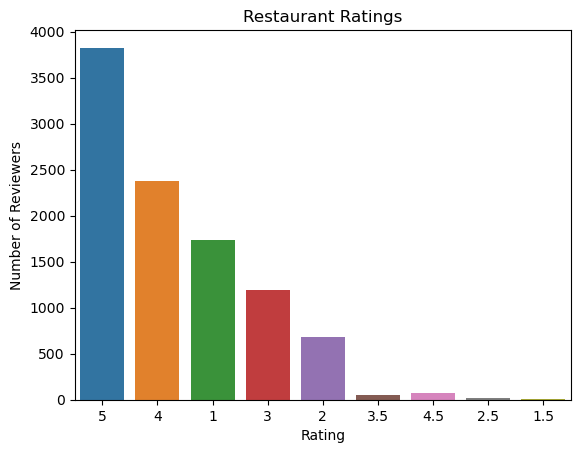

In [17]:

sns.countplot(data=restaurant,x="Rating") # the count plot for ratings given in the dataset
plt.title("Restaurant Ratings") #title of the plot
plt.ylabel("Number of Reviewers") 
plt.show()
#this is a count plot which gives the total number of values present for each category

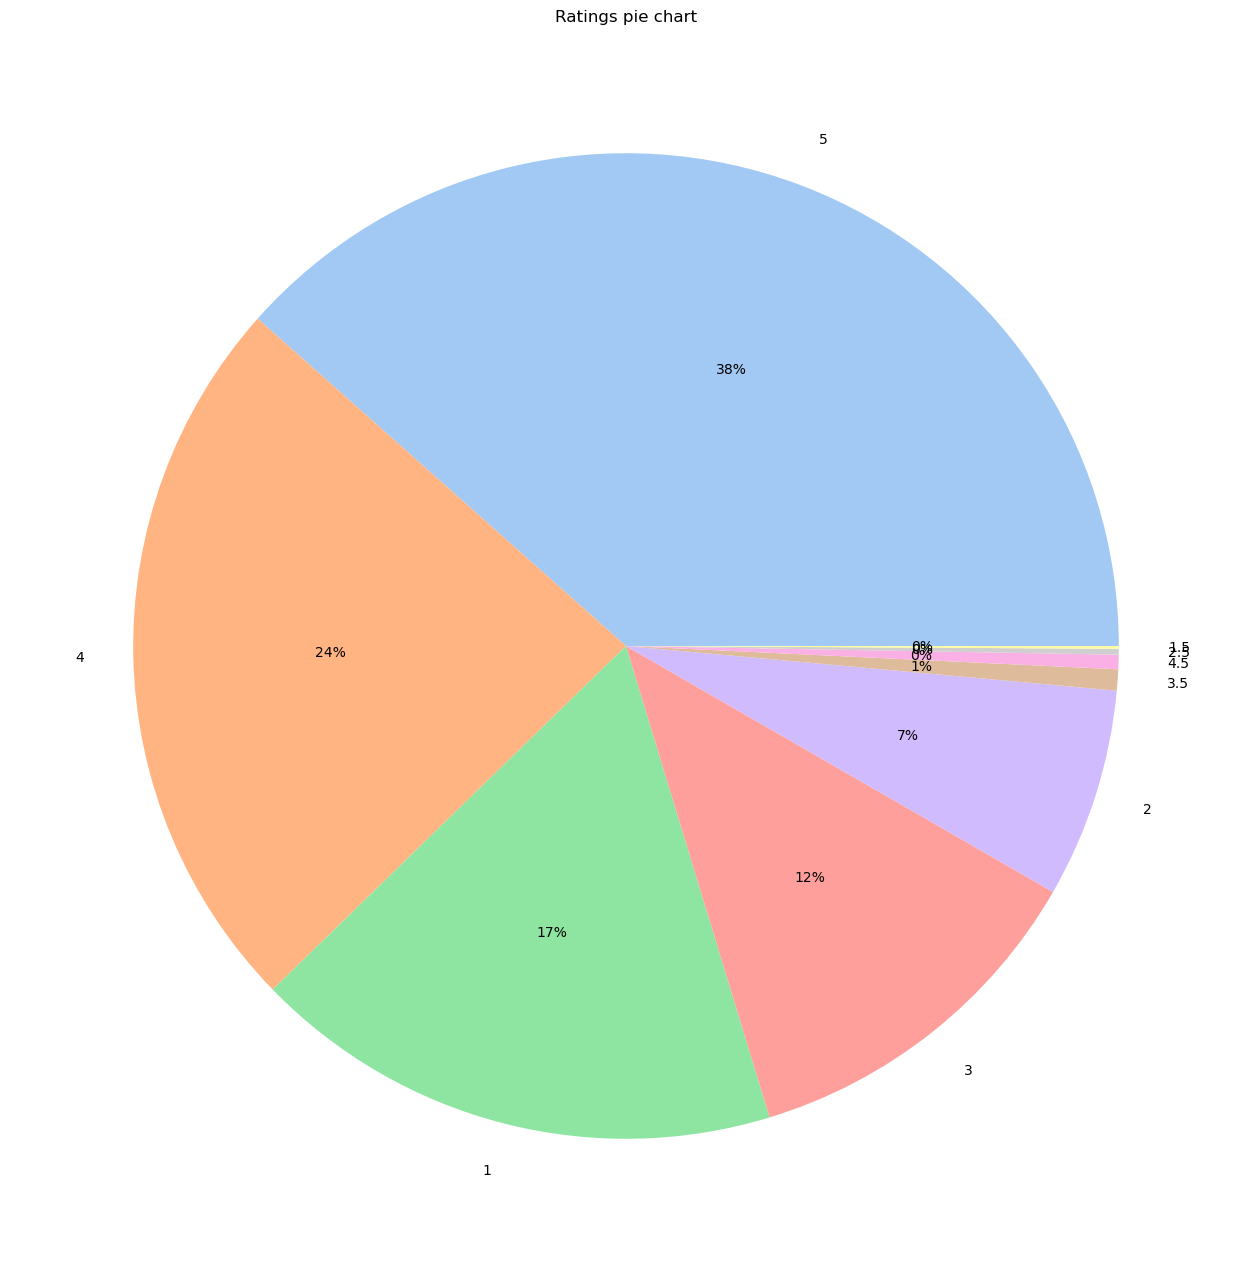

In [18]:
data = restaurant["Rating"].value_counts()
plt.figure(figsize=[16,16]) #the figure size
labels = [5,4,1,3,2,3.5,4.5,2.5,1.5] #labels of the ratings present
colors = sns.color_palette('pastel')
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Ratings pie chart")
plt.show()

#the below is the pie chart of the ratings present in the dataset()
#in total 100%, 38% are 5 star ratings, 24% are 4 star ratings, 17% are 1 star ratings, 12% are 3 star ratings, 7% are 2 star ratings, remaining are in little percentages

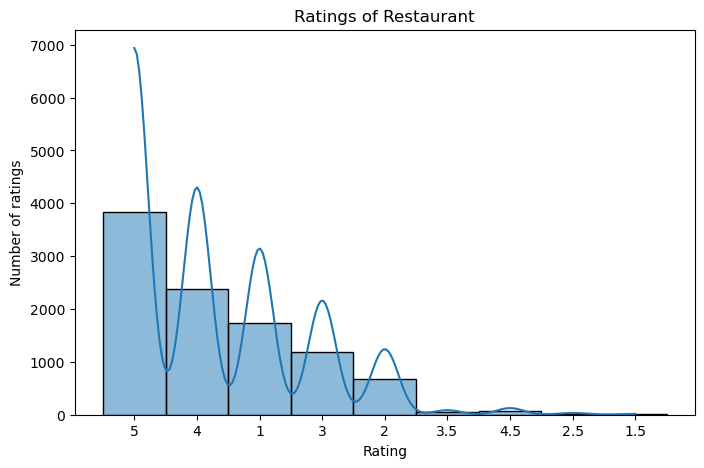

In [19]:
plt.figure(figsize=[8,5])
sns.histplot(data=restaurant,x="Rating",bins=20,kde=True).set(title="Ratings of Restaurant",ylabel="Number of ratings")
plt.show()
#the histogram plot that shows the number of 5 star ratings, 4 star ratings,etc 
#in total there ae more 5 star ratings and less are 1.5 star ratings

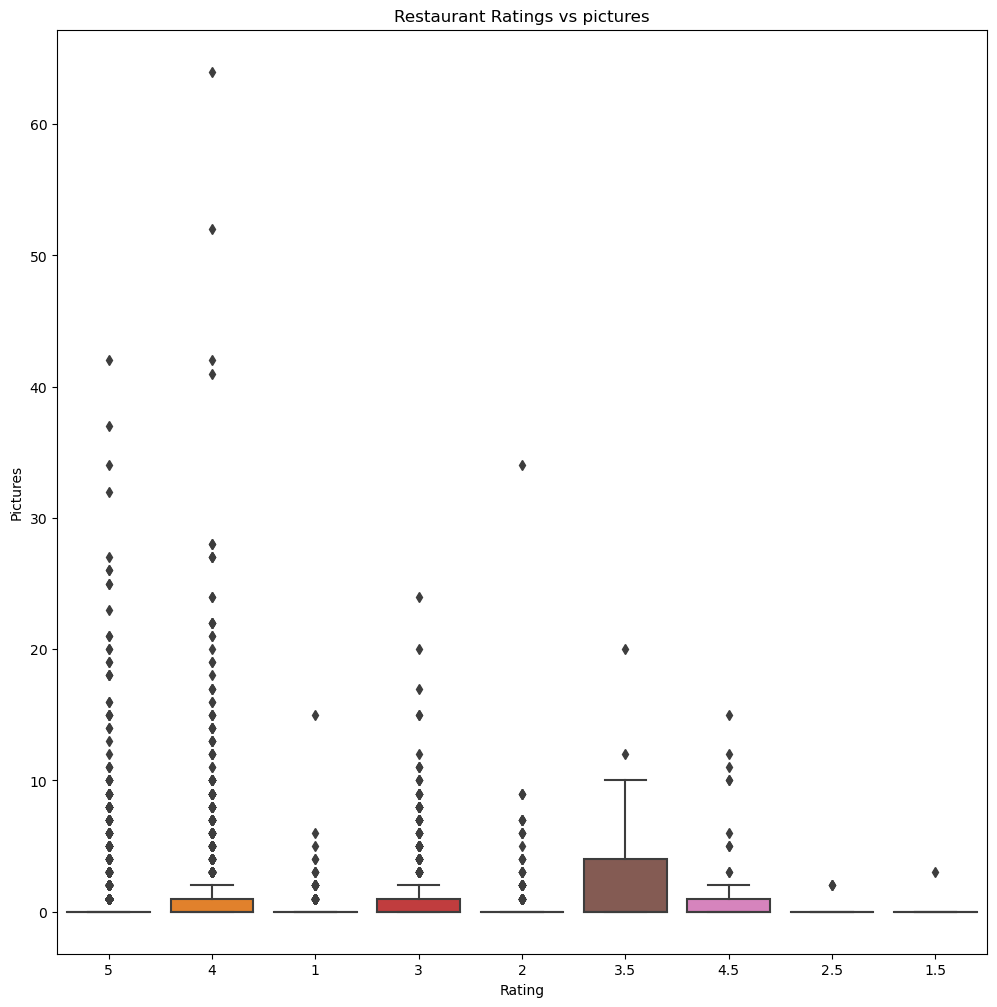

In [20]:
#Plotting boxplots to compare dispersion
plt.figure(figsize=[12,12])
sns.boxplot(data=restaurant,x='Rating', y='Pictures')
plt.title("Restaurant Ratings vs pictures")
plt.show()

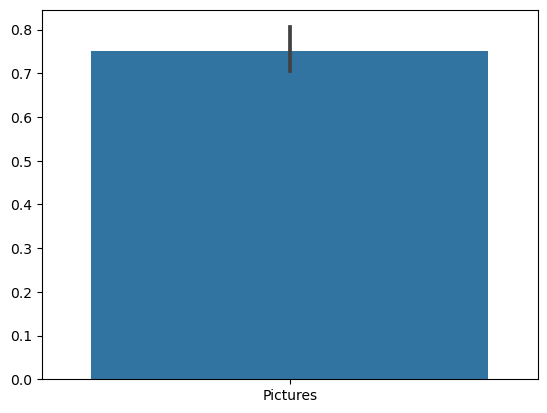

In [21]:

sns.barplot(data = restaurant)
plt.show()
#the bar plot of the pictures ( there are very little pictures posted related to reviews, so the value is small )

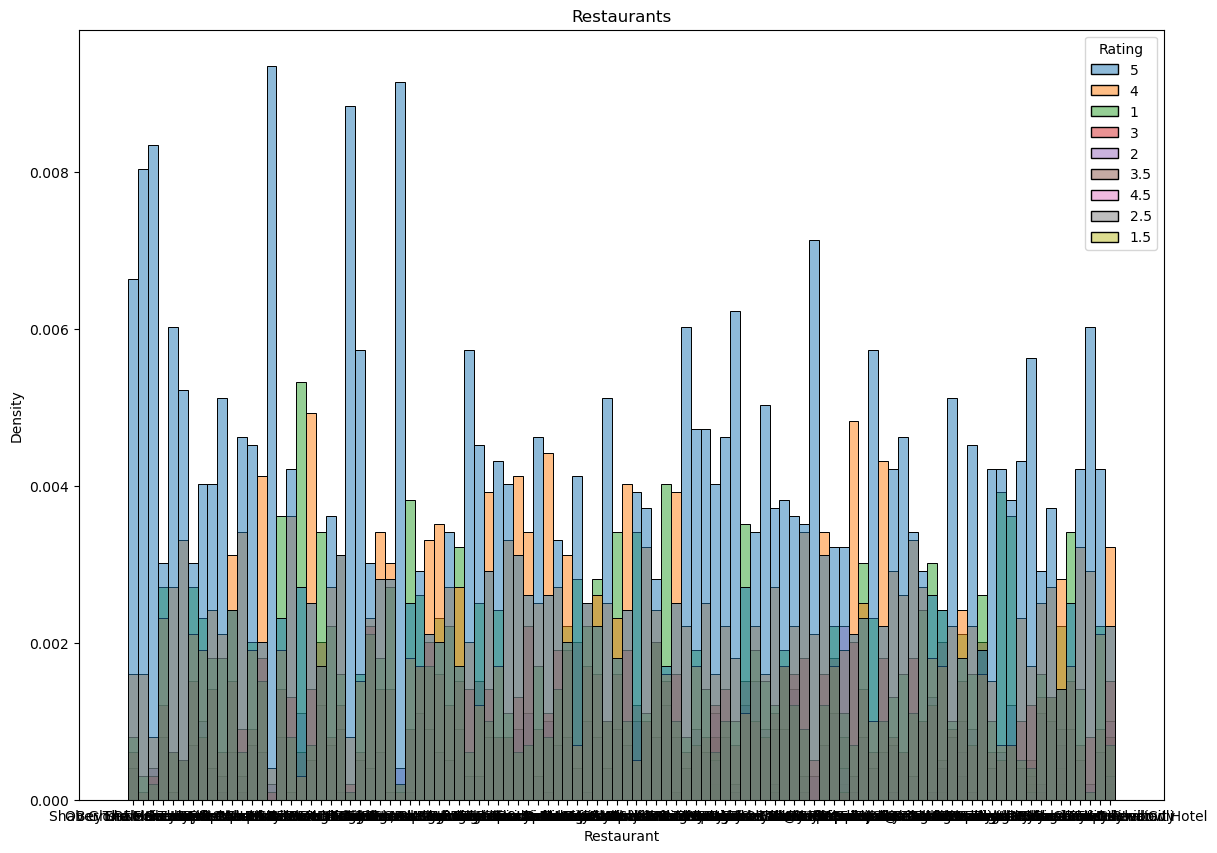

In [22]:
plt.figure(figsize=[14,10])
sns.histplot(restaurant,x="Restaurant",hue="Rating",element="bars",stat="density")
plt.title("Restaurants")
plt.show()

#

In [23]:
restaurant.to_csv('restaurant_cleaned_dataset.csv',encoding='utf-8', index=False)

In [60]:
# from sklearn.model_selection import  train_test_split 

from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB , BernoulliNB

from sklearn.ensemble import RandomForestClassifier 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from wordcloud import WordCloud

from collections import Counter


In [25]:

from pylab import rcParams

import statistics 

import string

import re

import nltk

from nltk.corpus import words

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Pre-Processing

In [27]:
# retrieving Stopwords
STOPWORDS=stopwords.words("english") 
print("Stop words  ::: \n",STOPWORDS)

Stop words  ::: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same

In [28]:
# required words are
required=["not" ,"no" ,"nor","don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"] 
# removing some required words from stopwords 
STOPWORDS=list(set(STOPWORDS)-set(required))
type(set(STOPWORDS))
print("Final Stopwords  :::\n",STOPWORDS)

Final Stopwords  :::
 ['below', 'these', 'off', 're', 'because', 'he', "it's", 'do', 'being', 'does', 'are', 'only', 'while', 'what', 'who', 'your', 'has', 'by', 'yourself', 'few', 'through', 'himself', 'but', 'hers', "you're", 'o', 'after', 'very', 't', 'as', 'her', 'his', 'doing', "she's", 'a', 'over', 'i', 'any', 'so', 'should', 'm', 'on', 'be', 'to', 'its', 'was', 'here', 've', 'this', 'and', 'there', 'don', 'have', 'just', 'whom', 'yours', 'ourselves', 'herself', 'had', 'an', 'she', 'each', 'from', 'yourselves', 'until', 'now', 'in', 'it', 'during', 'my', 'with', 'were', 'myself', "you'll", 'or', 'which', 'out', 'they', 'above', 'same', 'all', 'between', 'too', 'the', 'themselves', 'again', 'd', 'for', 'been', 'further', 'how', 'where', 'than', 'we', 'having', 'can', 'those', 'if', 'other', 'theirs', 'y', 'then', 'own', "you've", 'at', 'why', 'such', 'me', 'you', 'him', 'some', 'when', 'itself', "you'd", 'will', 'of', 'up', 'that', 'their', 'once', 'before', 'most', 'against', 'is

In [29]:
# downloading words in english dictionary 
nltk.download('words')

# downloading wordnet for Lemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
setofwords = set(words.words())
print("some of the words in dictionary    :::\n",list(setofwords)[:50])

some of the words in dictionary    :::
 ['carl', 'Pulicidae', 'tactor', 'goosebone', 'relocable', 'discommodiously', 'oiled', 'openness', 'irreconciliably', 'softling', 'prediscuss', 'steepled', 'ingrandize', 'unethereal', 'gio', 'decametre', 'glumose', 'superingenuity', 'corroborant', 'pigface', 'vintneress', 'repairableness', 'babouche', 'gadoid', 'psilosis', 'asarabacca', 'Taenioglossa', 'sugescent', 'statist', 'tetartosymmetry', 'protein', 'twitlark', 'semimetamorphosis', 'Pajonism', 'supertare', 'unegregious', 'Chermes', 'diselectrification', 'Rees', 'seriema', 'dreamingly', 'elongate', 'dregless', 'undoubtingness', 'mountainously', 'lankily', 'philomathematical', 'cyanotic', 'trichotomous', 'liberative']


In [31]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Filtering the text

In [32]:
# Using Lemmatising to convert words into their common base form
lemmatizer = WordNetLemmatizer()

def deEmojify(inputString):#to remove emojis in the text.
    try:
        return inputString.encode('ascii', 'ignore').decode('ascii') 
    except:
        return inputString
   #most common unnecessary words. eg is, he, that, etc
def filter_text(text):
    text=re.sub('\n+', ' ', text)
    text=deEmojify(str(text))
    text_cleaned=re.sub(' +', ' ', text) # remove extra white spaces
    
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    
    ftokens=[]
    for token in tokens:
        if token!='':
            if "n't" in token:
                ftokens.append('not')
            elif token not in STOPWORDS:
                ftokens.append(token)
    tokens=[]
    for token in ftokens:
        st=[]
        for x in token:
            if x not in string.punctuation:
                st.append(x)
        if len(st)!=0:
            tokens.append(''.join([tkn for tkn in st]) )
                
                    
    tokens=[token for token in tokens if token.isalpha()]  # only alphabets
    tokens=[token for token in tokens if token in setofwords] # only words from english dictionary 
    tokens=[lemmatizer.lemmatize(token) for token in tokens] 
    
    # Taking only those words which are not stopwords
    text_cleaned = ' '.join([str(token) for token in tokens]) 
    
    return text_cleaned
print (filter_text("\n\n\nI found some of the dishes especially curries very unique and tasty, and the options in biryanis they provide makes them my favourite dinner place.\n\n\n"))

found especially unique tasty provide dinner place


In [33]:
# considering equal rows from negative and positive dataframe each 
# to get equal amount of model training for positive and negative reviews

minimumCount=8000
#min(20000,len(amazon_data_pos),len(amazon_data_neg))


In [34]:
# function to calculate time taken 
def calcTime(startTime):
    endTime=time.time()
    Time=(endTime-startTime)
    return str(round(Time/60.0,4))+" min  or  "+str(round(Time,4))+" sec"

In [35]:
pos_reviews=[]
a=time.time()
i=0
print(1)
print(restaurant[restaurant["Rating"].isin([4,4.5,5])].Review)
#print(rows)
   

1
Series([], Name: Review, dtype: object)


In [36]:
restaurant

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [37]:
restaurant['Rating'] = restaurant['Rating'].astype(float)

In [38]:
restaurant["Rating"].describe()
#print(restaurant[Rating(0)])

count    9954.000000
mean        3.600261
std         1.483573
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [39]:
pos_reviews=[]
a=time.time()
i=0
for rows in restaurant[restaurant["Rating"].isin([3.5,4,4.5,5])].Review:
    
    i+=1
    if(len(pos_reviews)==minimumCount):
        break
    rows=filter_text(str(rows))        ## filtering all reviews in dataframe
    if(rows!=''):
        pos_reviews.append(rows)
print("Iterations taken ::: ",i)


# add an extra feature as 'r' to consider 1 liked rating as 1 and 0 liked rating as 0 
# here 0,1 indicates the rating as negative and posite respectively

restaurant_data_pos=pd.DataFrame(list(zip(pos_reviews,[1]*minimumCount)),columns=['Review','r'])
print(restaurant_data_pos)
print("Time taken to get positive reviews :::",calcTime(a))

Iterations taken :::  6315
                                                 Review  r
0     ambience good food quite good lunch cost effec...  1
1     ambience good pleasant evening service prompt ...  1
2     must try great food great ambience service per...  1
3     da great guy behavior good food course would l...  1
4     food ordered basket mutton good thanks well he...  1
...                                                 ... ..
6255  restaurant immediately blown away quality serv...  1
6256  going cut chase food excellent must say honey ...  1
6257  place never disappointed u food courteous staf...  1
6258  personally love prefer food couple time husban...  1
6259  checked try delicious food here seen luncheon ...  1

[6260 rows x 2 columns]
Time taken to get positive reviews ::: 0.045 min  or  2.7008 sec


In [40]:
neg_reviews=[]
a=time.time()
i=0
for rows in restaurant[restaurant["Rating"].isin([1,1.5,2,2.5])] .Review:
    i+=1
    if(len(neg_reviews)==minimumCount):
        break
    rows=filter_text(str(rows)) 
    if(rows!=''):
        neg_reviews.append(rows)
print("i",i)
restaurant_data_neg=pd.DataFrame(list(zip(neg_reviews,[0]*minimumCount)),columns=['Review','r'])
print(restaurant_data_neg)
print("Time taken to get negative reviews :::",calcTime(a))

i 2447
                                                 Review  r
0     ordered corn cheese soup stale smelling waiter...  0
1     went team lunch worst restaurant food tasteles...  0
2     place dinner day back ambience good restaurant...  0
3     would like introduce restaurant new ingredient...  0
4     hostile staff food not great not sure rating w...  0
...                                                 ... ..
2428  last night ordered pan fried pavilion pan frie...  0
2429  place thinking good meal spend time moment aro...  0
2430  regular pavilion first visit disappointed plac...  0
2431  pavilion first restaurant still great authenti...  0
2432  bad rating mainly chicken bone found food not ...  0

[2433 rows x 2 columns]
Time taken to get negative reviews ::: 0.0168 min  or  1.0076 sec


In [41]:
minimumcount = min(len(restaurant_data_pos),len(restaurant_data_neg))
restaurant_data_neg=restaurant_data_neg.iloc[:minimumcount]
restaurant_data_pos=restaurant_data_pos.iloc[:minimumcount]

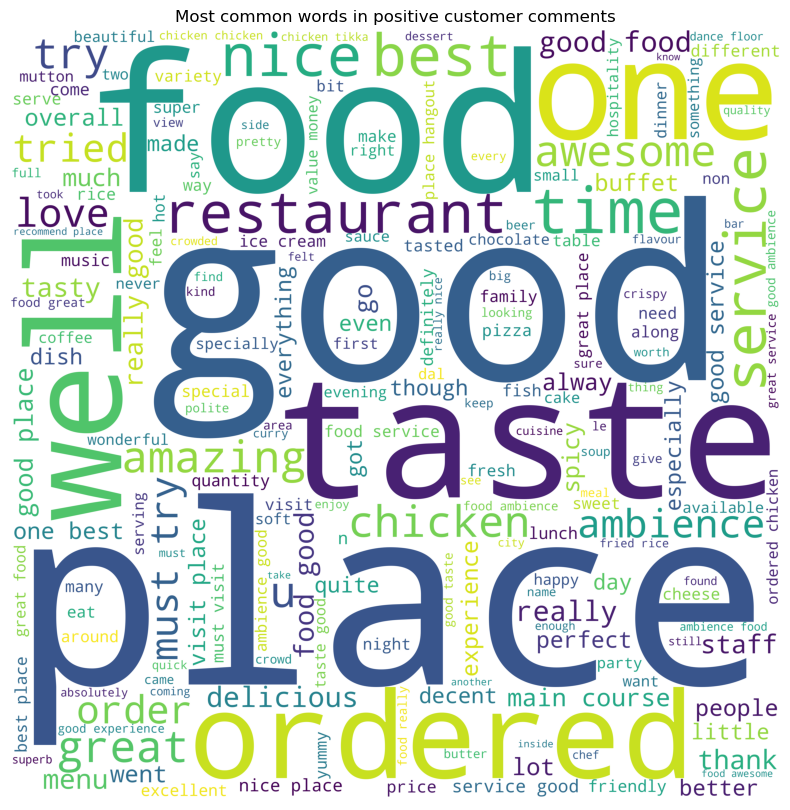

Time taken to build positive wordcloud ::: 1.1739 min  or  70.4366 sec


In [42]:
a=time.time()
wordcloud = WordCloud(height=4000, width=4000, background_color='white')
wordcloud = wordcloud.generate(' '.join(pos_reviews))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()
print("Time taken to build positive wordcloud :::",calcTime(a))

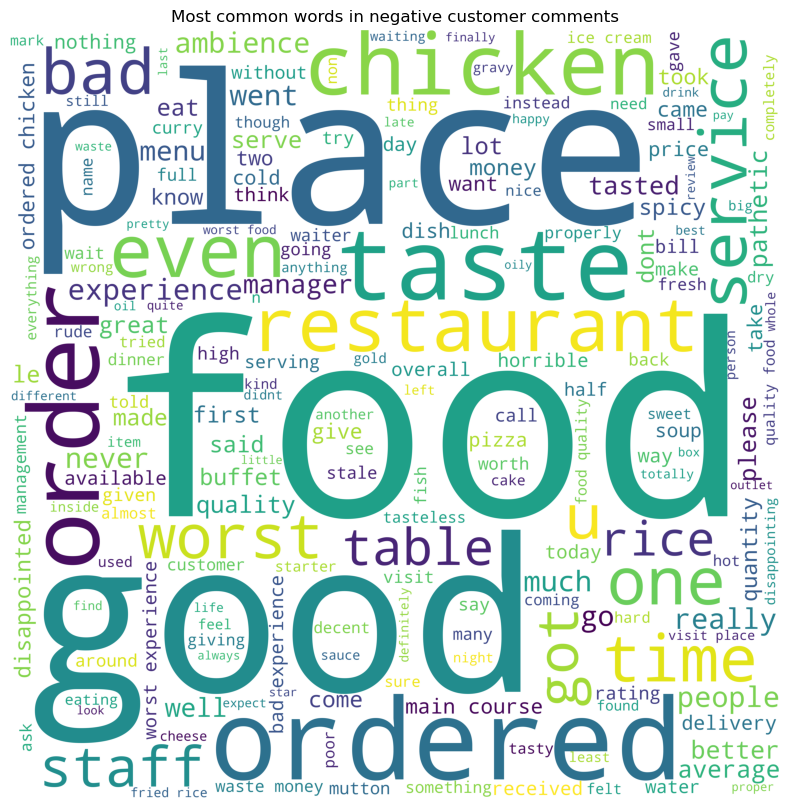

Time taken to build negative wordcloud ::: 0.9901 min  or  59.4033 sec


In [43]:
a=time.time()
wordcloud = WordCloud(height=4000, width=4000,background_color='white')
wordcloud = wordcloud.generate(' '.join(neg_reviews))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()
print("Time taken to build negative wordcloud :::",calcTime(a))

In [44]:
print("Shape of complete dataframe : ",restaurant.shape)
print("Shape of positive dataframe : ",restaurant_data_pos.shape)
print("Shape of negative dataframe : ",restaurant_data_neg.shape)

Shape of complete dataframe :  (9954, 7)
Shape of positive dataframe :  (2433, 2)
Shape of negative dataframe :  (2433, 2)


Time taken    :::  0.0068 min  or  0.4062 sec


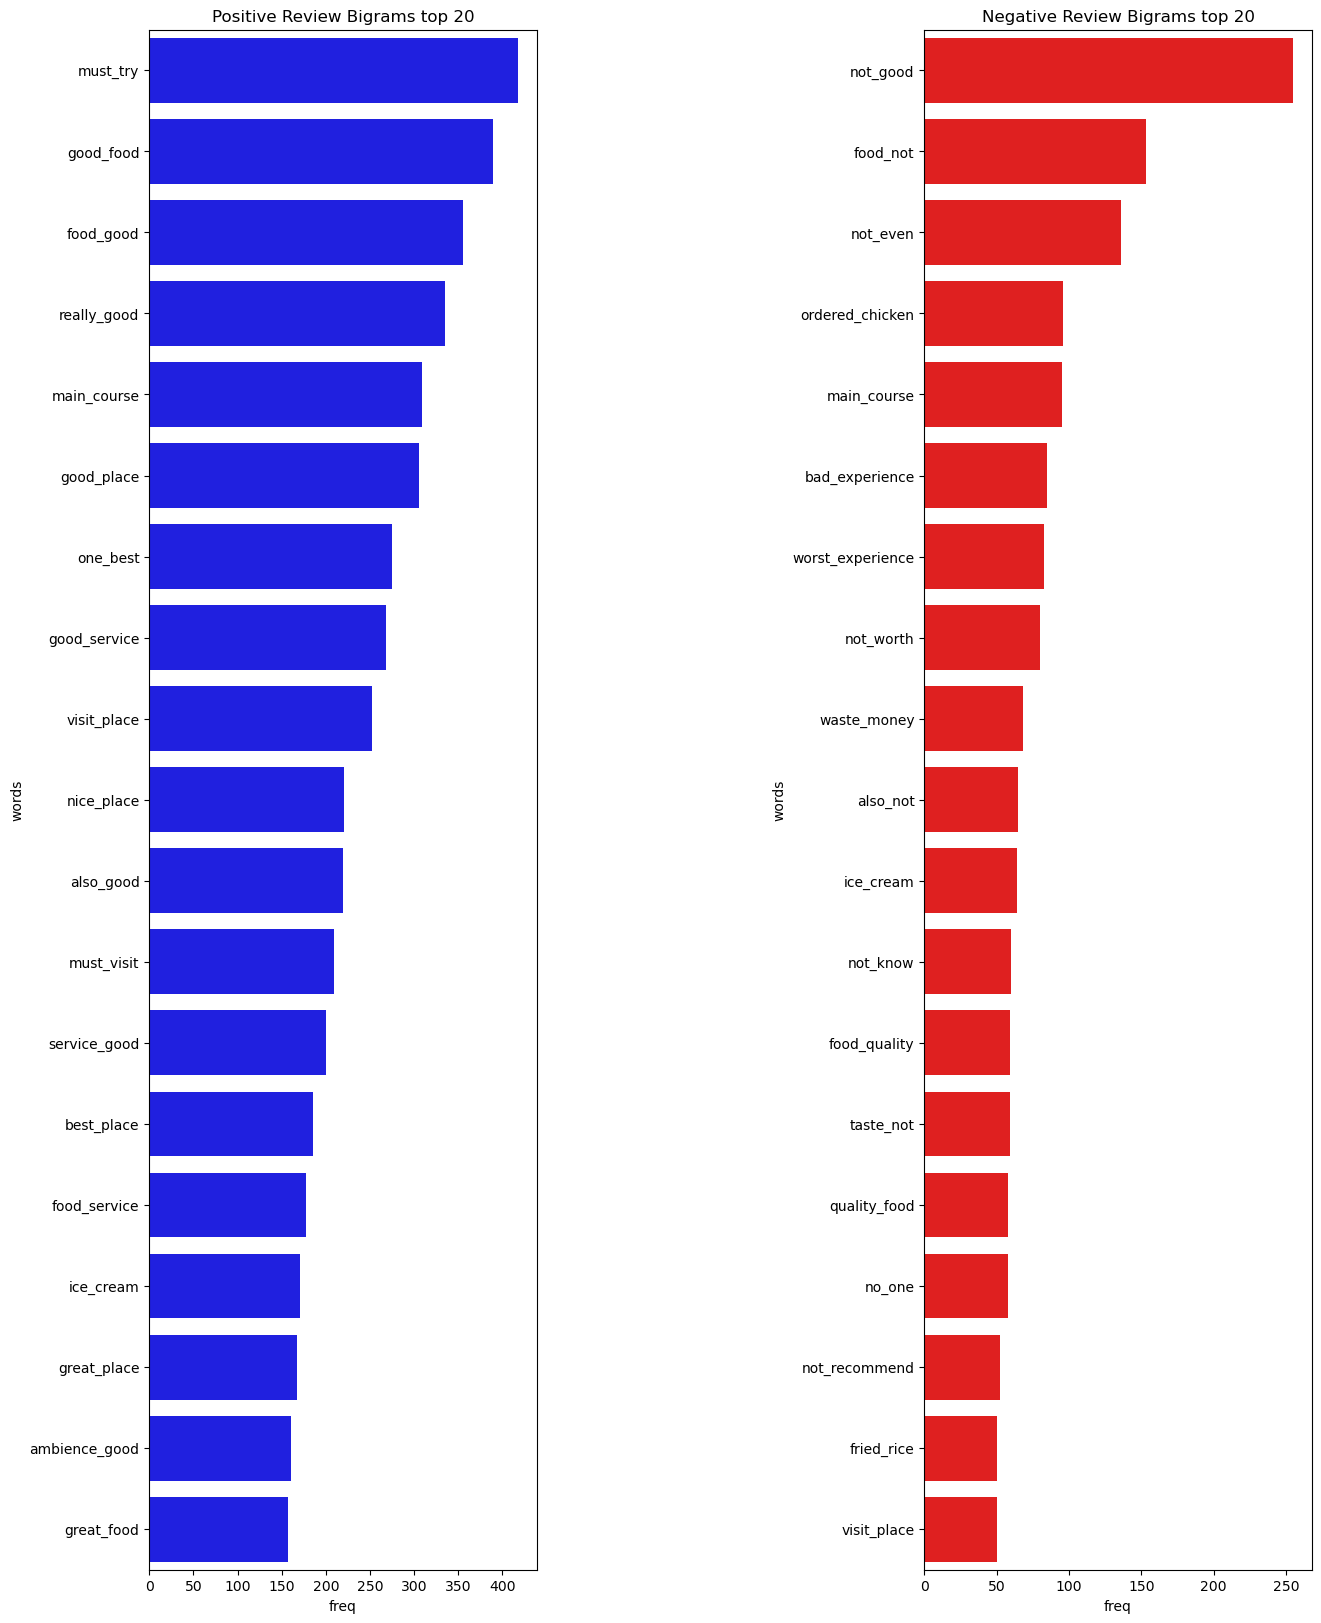

In [45]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)

def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]


def plotMostCommonWords(reviews_list,topn=30,title="Common Review Words",color="blue",axis=None): #default number of words is given as 30
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    data=data[data['words']!='']    
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))
        
        

a=time.time()
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in pos_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in neg_reviews]

rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,20,'Positive Review Bigrams',axis=ax[0])
plotMostCommonWords(negative_reviews_bigrams,20,'Negative Review Bigrams',color="red",axis=ax[1])
print("Time taken    ::: ",calcTime(a))

                                                 Review  r
0     ambience good food quite good lunch cost effec...  1
1     ambience good pleasant evening service prompt ...  1
2     must try great food great ambience service per...  1
3     da great guy behavior good food course would l...  1
4     food ordered basket mutton good thanks well he...  1
...                                                 ... ..
2428  last night ordered pan fried pavilion pan frie...  0
2429  place thinking good meal spend time moment aro...  0
2430  regular pavilion first visit disappointed plac...  0
2431  pavilion first restaurant still great authenti...  0
2432  bad rating mainly chicken bone found food not ...  0

[4866 rows x 2 columns]


<AxesSubplot:>

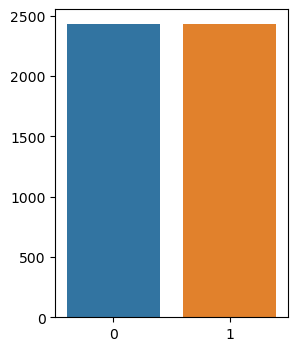

In [46]:
# merging two dataframes to single dataframe as filtered dataframe
#print(restaurant_data_neg[Reviews]==NaN)
restaurant_data_filtered =pd.concat([restaurant_data_pos,restaurant_data_neg])
print(restaurant_data_filtered)
plt.figure(figsize=(3,4))
sns.barplot(x=restaurant_data_filtered.r.value_counts().index,y=restaurant_data_filtered.r.value_counts().values)

# Training and Testing

In [47]:
# from sklearn.model_selection import train_test_split
# X_train_data, x_test_data,Y_train_data,y_test_data=train_test_split(amazon_data_filtered["Reviews"],amazon_data_filtered["r"],test_size=0.2,shuffle=True)

testsize=int(0.2 * len(restaurant_data_pos))
print("Test size is :::",testsize)
restaurant_data_test=pd.concat([restaurant_data_pos[:testsize],restaurant_data_neg[:testsize]])
restaurant_data_train=pd.concat([restaurant_data_pos[testsize:],restaurant_data_neg[testsize:]])


X_train_data , x_test_data = restaurant_data_train["Review"],restaurant_data_test["Review"]
Y_train_data , y_test_data = restaurant_data_train["r"],restaurant_data_test["r"]

print("total shape of dataframe : ",restaurant_data_filtered.shape)
print("obtained rows of Y after split (train , test)  : (",Y_train_data.shape[0],",", y_test_data.shape[0],")")
print("obtained rows of X after split (train , test)  : (",X_train_data.shape[0],",", x_test_data.shape[0],")")
#print("sum =", sum((Y_train_data.shape[0],y_test_data.shape[0])))
print( restaurant_data_test.r.value_counts(),restaurant_data_train.r.value_counts(),"\n", sep="\n\n")
print(Y_train_data.value_counts(),"\n\n")
print( y_test_data.value_counts(),"\n\n")
print(X_train_data.value_counts(),"\n\n")
print( x_test_data.value_counts(),"\n\n")

Test size is ::: 486
total shape of dataframe :  (4866, 2)
obtained rows of Y after split (train , test)  : ( 3894 , 972 )
obtained rows of X after split (train , test)  : ( 3894 , 972 )
1    486
0    486
Name: r, dtype: int64

1    1947
0    1947
Name: r, dtype: int64



1    1947
0    1947
Name: r, dtype: int64 


1    486
0    486
Name: r, dtype: int64 


good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

# Feature Extraction

In [48]:
#tfidf Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vector=TfidfVectorizer(stop_words= STOPWORDS)

tfidf_vector.fit(X_train_data)
print(tfidf_vector.get_feature_names()[:20])

print(tfidf_vector.get_feature_names()[-28])

['aa', 'abhorrence', 'abide', 'ability', 'able', 'abruptly', 'absent', 'absolute', 'absolutely', 'absorbed', 'abusive', 'accept', 'acceptable', 'acceptably', 'accepted', 'access', 'accessible', 'accident', 'accidentally', 'accommodate']
written


In [49]:
X_train_data_new=tfidf_vector.transform(X_train_data)

print(X_train_data_new.shape)

x_test_data_new=tfidf_vector.transform(x_test_data)

(3894, 4419)


In [50]:
print(X_train_data_new,Y_train_data)

  (0, 4205)	0.20824355104956258
  (0, 3520)	0.18853149919236276
  (0, 3407)	0.2436687265751967
  (0, 3403)	0.09301471700793949
  (0, 3085)	0.12381465272038482
  (0, 3060)	0.338269379416864
  (0, 2839)	0.1648209032784029
  (0, 2785)	0.17911238769210824
  (0, 2652)	0.2450920105149751
  (0, 2629)	0.11610942235239055
  (0, 2557)	0.18238674369269292
  (0, 2545)	0.1676757021632658
  (0, 2387)	0.15466349286355383
  (0, 1710)	0.36965261095700025
  (0, 1678)	0.14416857241676284
  (0, 1536)	0.07041180555209127
  (0, 1335)	0.18722359367584657
  (0, 997)	0.23143263810526005
  (0, 328)	0.21543641659939494
  (0, 266)	0.18017392805269317
  (0, 213)	0.338269379416864
  (0, 150)	0.1980054356526543
  (0, 116)	0.14731438340064998
  (1, 3349)	0.505826796470752
  (1, 2839)	0.3188174181170593
  :	:
  (3893, 1388)	0.045009473073540675
  (3893, 1243)	0.07374514270382311
  (3893, 1136)	0.06495994270977141
  (3893, 1124)	0.08064678527300252
  (3893, 1094)	0.06798635058265586
  (3893, 1018)	0.10536588894902486
 

In [51]:
def modelAnalyzer(classifierName):
    print("\n\n",classifierName," Classifier",sep="") 
    print("Accuracy                :::", accuracy[classifierName])
    #Generating Confusion matrix
    print("Confusion matrix        :::")
    print(confusion_matrix(y_test_data, predictions[classifierName]))
    
    
    cf_matrix=confusion_matrix(y_test_data, predictions[classifierName])
    #using the heat map to find how they are correlated
    plt.figure(figsize=(5,5))
    sns.heatmap(cf_matrix, annot=True,fmt="0.1f")
    #sns.heatmap(corr,cbar=True,annot=True,fmt="0.1f",cmap='plasma_r',square=True)
    plt.show()

    #Calculating Precision, Recall and Measure
    print("\nclassification report   :::")
    print(classification_report(y_test_data, predictions[classifierName], target_names=["Positive", "Negative"]))

    #Generating ROC curve
    false_positive, true_positive,_= roc_curve(y_test_data,predictions[classifierName])
    plt.figure(figsize=(7,6))
    plt.title("Receiver operating characteristic curve")
    plt.plot(false_positive, true_positive)
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    plt.show()

In [52]:
predictions=dict()
accuracy=dict()
models=dict()



SVM classifier
Please be patient. This may take some time.
Train Started
Time taken to fit       ::: 0.0527 min  or  3.1592 sec
Time taken to predict   ::: 0.012 min  or  0.7187 sec
Accuracy                ::: 0.9609053497942387


SVM Classifier
Accuracy                ::: 0.9609053497942387
Confusion matrix        :::
[[470  16]
 [ 22 464]]


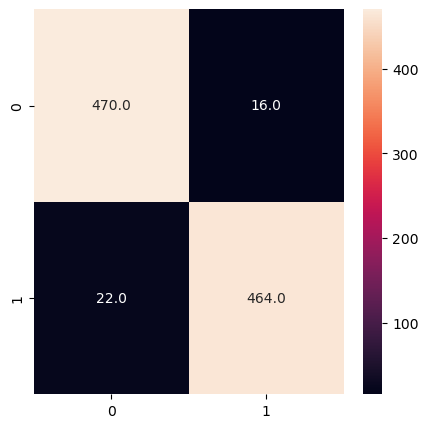


classification report   :::
              precision    recall  f1-score   support

    Positive       0.96      0.97      0.96       486
    Negative       0.97      0.95      0.96       486

    accuracy                           0.96       972
   macro avg       0.96      0.96      0.96       972
weighted avg       0.96      0.96      0.96       972



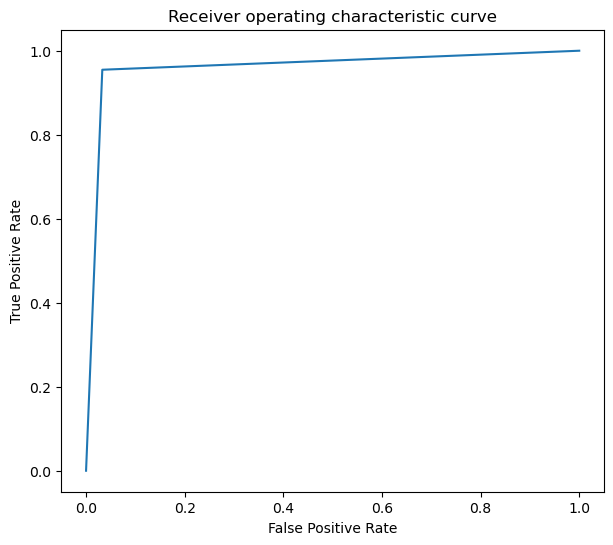

Overall time taken for SVM classifier ::: 0.0717 min  or  4.3002 sec


In [53]:
#1. SVM classifier
print("\n\nSVM classifier") 
print("Please be patient. This may take some time.")
models["SVM"]=SVC()

#Train Model
print("Train Started")
aaa=time.time()
models["SVM"].fit(X_train_data_new,Y_train_data)
print("Time taken to fit       :::",calcTime(aaa))

#Test Model
x=time.time()
predictions['SVM']=models["SVM"].predict(x_test_data_new)
print("Time taken to predict   :::",calcTime(x))

# Calculating model accuracy
accuracy['SVM']=accuracy_score(y_test_data, predictions['SVM'])
print("Accuracy                :::", accuracy['SVM'])

modelAnalyzer('SVM')
print("Overall time taken for SVM classifier :::",calcTime(aaa))



RandomForest Classifier
Please be patient. This may take some time
Train Started
Time taken to fit       ::: 0.0479 min  or  2.872 sec
Time taken to predict   ::: 0.0013 min  or  0.0781 sec
Accuracy                ::: 0.9547325102880658


RandomForest Classifier
Accuracy                ::: 0.9547325102880658
Confusion matrix        :::
[[463  23]
 [ 21 465]]


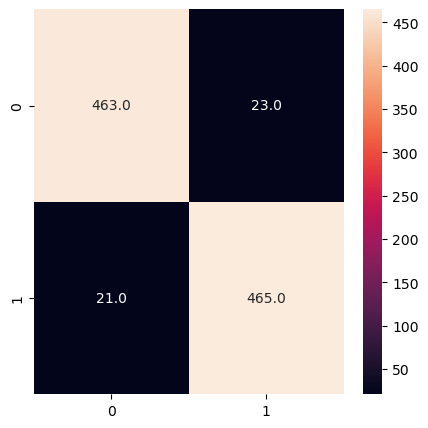


classification report   :::
              precision    recall  f1-score   support

    Positive       0.96      0.95      0.95       486
    Negative       0.95      0.96      0.95       486

    accuracy                           0.95       972
   macro avg       0.95      0.95      0.95       972
weighted avg       0.95      0.95      0.95       972



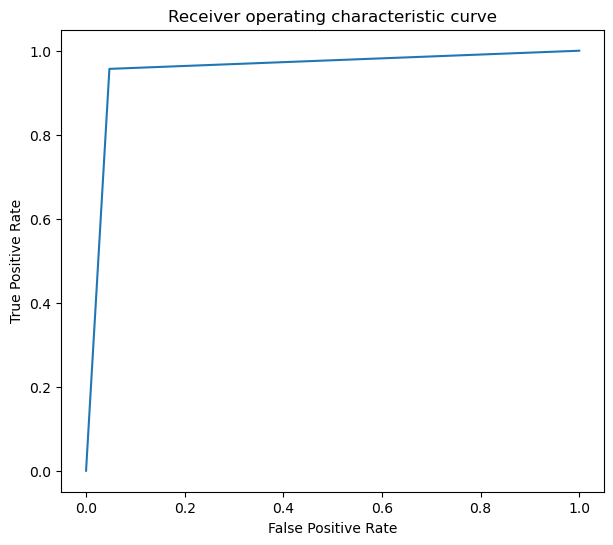

Overall time taken for RandomForest Classifier ::: 0.0572 min  or  3.4345 sec


In [54]:
#2. RandomForest Classifier

print("\n\nRandomForest Classifier") 
print("Please be patient. This may take some time")

models["RandomForest"]=RandomForestClassifier()
#Train Model
print("Train Started")
aaa=time.time()
models["RandomForest"].fit(X_train_data_new ,Y_train_data)
print("Time taken to fit       :::",calcTime(aaa))

#Test Model
x=time.time()
predictions ["RandomForest"]=models["RandomForest"].predict(x_test_data_new)
print("Time taken to predict   :::",calcTime(x))

#Calculating model accuracy
accuracy["RandomForest"]=accuracy_score(y_test_data, predictions["RandomForest"])
print("Accuracy                :::", accuracy["RandomForest"])

modelAnalyzer("RandomForest")

print("Overall time taken for RandomForest Classifier :::",calcTime(aaa))



Multinomial Naive Bayes Classifier
Train Started
Time taken to fit       ::: 0.0 min  or  0.0 sec
Time taken to predict   ::: 0.0 min  or  0.0 sec
Accuracy                ::: 0.9588477366255144


Multinomial Naive Bayes Classifier
Accuracy                ::: 0.9588477366255144
Confusion matrix        :::
[[460  26]
 [ 14 472]]


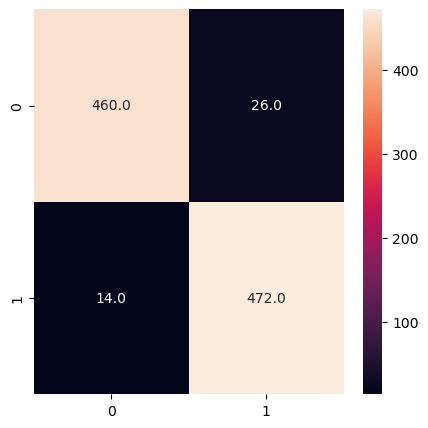


classification report   :::
              precision    recall  f1-score   support

    Positive       0.97      0.95      0.96       486
    Negative       0.95      0.97      0.96       486

    accuracy                           0.96       972
   macro avg       0.96      0.96      0.96       972
weighted avg       0.96      0.96      0.96       972



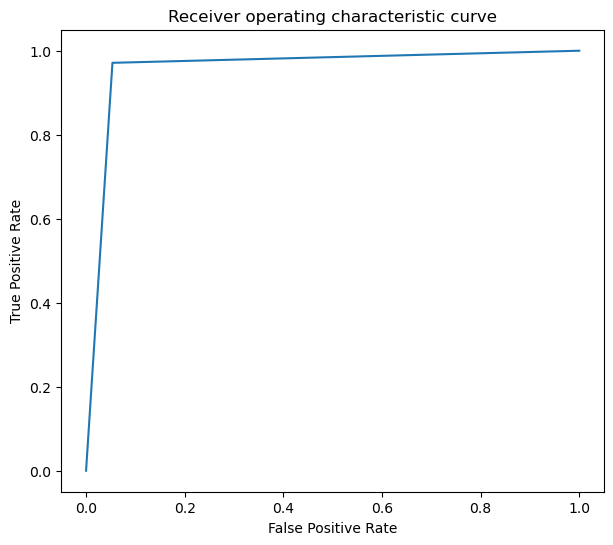

Overall time taken for Multinomial Naive Bayes Classifier::: 0.0107 min  or  0.6406 sec


In [55]:
#3. Multinomial Naive Bayes Classifier

print("\n\nMultinomial Naive Bayes Classifier") 

models["Multinomial Naive Bayes"]=MultinomialNB()
#Train Model
print("Train Started")
aaa=time.time()
models["Multinomial Naive Bayes"].fit(X_train_data_new,Y_train_data)
print("Time taken to fit       :::",calcTime(aaa))

#Test Model
x=time.time()
predictions["Multinomial Naive Bayes"]=models["Multinomial Naive Bayes"].predict(x_test_data_new)
print("Time taken to predict   :::",calcTime(x))

#Calculating model accuracy
accuracy["Multinomial Naive Bayes"]=accuracy_score(y_test_data, predictions["Multinomial Naive Bayes"])
print("Accuracy                :::", accuracy["Multinomial Naive Bayes"])

modelAnalyzer("Multinomial Naive Bayes")

print("Overall time taken for Multinomial Naive Bayes Classifier:::",calcTime(aaa))



Bernoulli Naive Bayes Classifier
Train Started
Time taken to fit       ::: 0.0 min  or  0.0 sec
Time taken to predict   ::: 0.0 min  or  0.0 sec
Accuracy                ::: 0.9598765432098766


Bernoulli Naive Bayes Classifier
Accuracy                ::: 0.9598765432098766
Confusion matrix        :::
[[469  17]
 [ 22 464]]


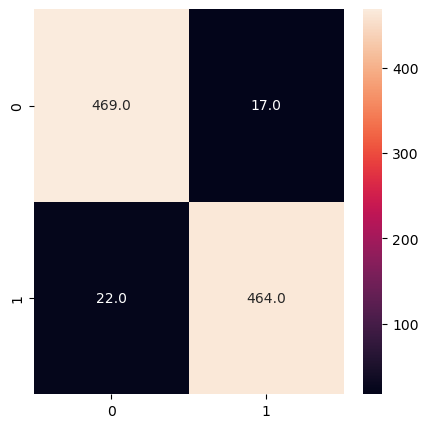


classification report   :::
              precision    recall  f1-score   support

    Positive       0.96      0.97      0.96       486
    Negative       0.96      0.95      0.96       486

    accuracy                           0.96       972
   macro avg       0.96      0.96      0.96       972
weighted avg       0.96      0.96      0.96       972



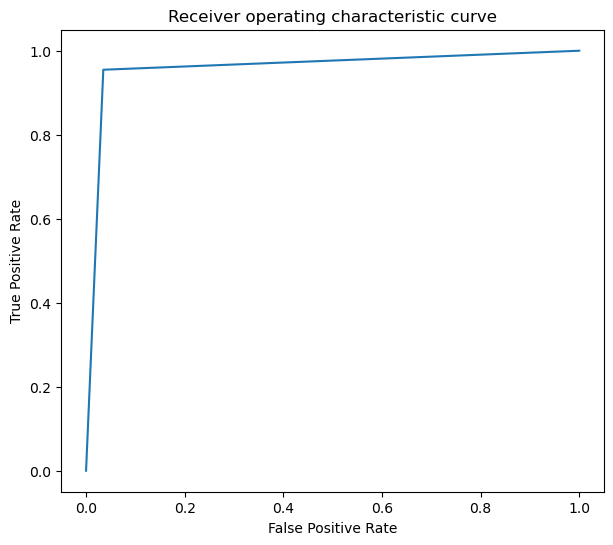

Overall time taken for Bernoulli Naive Bayes Classifier ::: 0.0076 min  or  0.4531 sec


In [56]:
#4. Bernoulli Naive Bayes Classifier

print("\n\nBernoulli Naive Bayes Classifier") 

models["Bernoulli Naive Bayes"]=BernoulliNB()
#Train Model
print("Train Started")
aaa=time.time()
models["Bernoulli Naive Bayes"].fit(X_train_data_new ,Y_train_data)
print("Time taken to fit       :::",calcTime(aaa))

#Test Model
x=time.time()
predictions ["Bernoulli Naive Bayes"]=models["Bernoulli Naive Bayes"].predict(x_test_data_new)
print("Time taken to predict   :::",calcTime(x))

#Calculating model accuracy
accuracy["Bernoulli Naive Bayes"]=accuracy_score(y_test_data, predictions["Bernoulli Naive Bayes"])
print("Accuracy                :::", accuracy["Bernoulli Naive Bayes"])

modelAnalyzer("Bernoulli Naive Bayes")

print("Overall time taken for Bernoulli Naive Bayes Classifier :::",calcTime(aaa))



KNeighbors Classifier
Please be patient. This may take some time
Train Started
Time taken to fit       ::: 0.0 min  or  0.0 sec
Time taken to predict   ::: 0.0044 min  or  0.2655 sec
Accuracy                ::: 0.8518518518518519


KNeighbors Classifier
Accuracy                ::: 0.8518518518518519
Confusion matrix        :::
[[415  71]
 [ 73 413]]


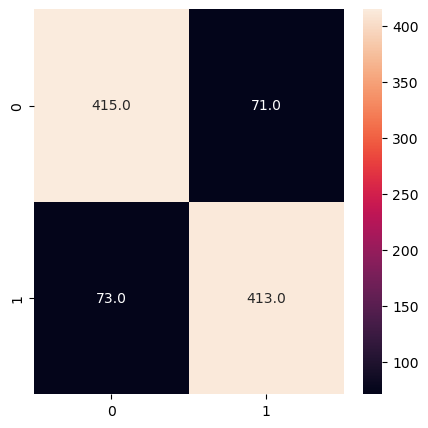


classification report   :::
              precision    recall  f1-score   support

    Positive       0.85      0.85      0.85       486
    Negative       0.85      0.85      0.85       486

    accuracy                           0.85       972
   macro avg       0.85      0.85      0.85       972
weighted avg       0.85      0.85      0.85       972



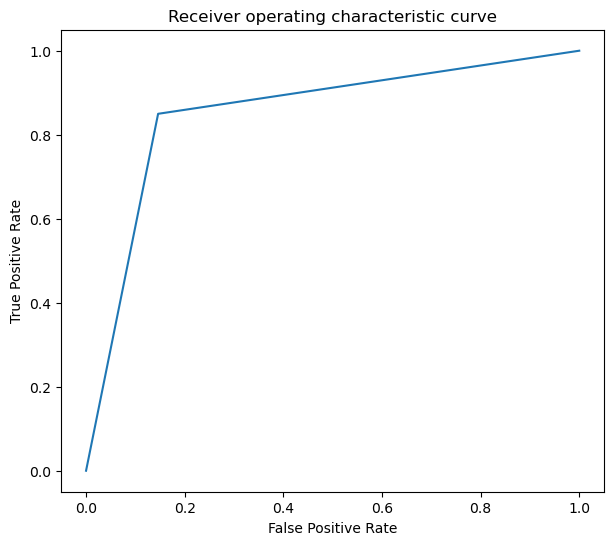

Overall time taken for RandomForest Classifier ::: 0.0122 min  or  0.7344 sec


In [57]:
#5. k-NN Classifier  

print("\n\nKNeighbors Classifier")
print("Please be patient. This may take some time")

models["KNeighbors"]= KNeighborsClassifier(n_neighbors=1)

#Train Model
print("Train Started")
aaa=time.time()
models["KNeighbors"].fit(X_train_data_new,Y_train_data)
print("Time taken to fit       :::",calcTime(aaa))

#Test Model
x=time.time()
predictions["KNeighbors"] = models["KNeighbors"].predict(x_test_data_new)
print("Time taken to predict   :::",calcTime(x))

#Calculating model accuracy
accuracy["KNeighbors"]=accuracy_score(y_test_data, predictions["KNeighbors"])
print("Accuracy                :::", accuracy["KNeighbors"])

modelAnalyzer("KNeighbors")

print("Overall time taken for RandomForest Classifier :::",calcTime(aaa))



Logistic Regression Classifier
Please be patient. This may take some time
Train Started
Time taken to fit       ::: 0.0021 min  or  0.125 sec
Time taken to predict   ::: 0.0 min  or  0.0 sec
Accuracy                ::: 0.9639917695473251


LogisticRegression Classifier
Accuracy                ::: 0.9639917695473251
Confusion matrix        :::
[[471  15]
 [ 20 466]]


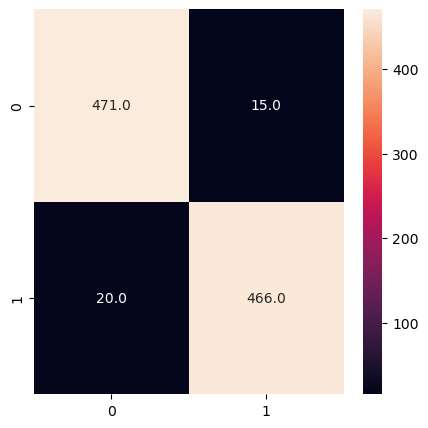


classification report   :::
              precision    recall  f1-score   support

    Positive       0.96      0.97      0.96       486
    Negative       0.97      0.96      0.96       486

    accuracy                           0.96       972
   macro avg       0.96      0.96      0.96       972
weighted avg       0.96      0.96      0.96       972



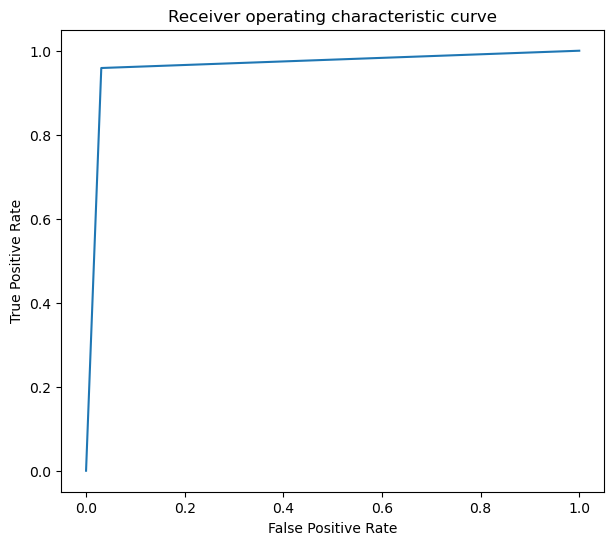

Overall time taken for LogisticRegression Classifier ::: 0.0094 min  or  0.5625 sec


In [58]:
#6.  Logistic Regression Classifier

print("\n\nLogistic Regression Classifier")
print("Please be patient. This may take some time")

models['LogisticRegression'] = LogisticRegression()

#Train Model
print("Train Started")
aaa=time.time()
models['LogisticRegression'].fit(X_train_data_new,Y_train_data)
print("Time taken to fit       :::",calcTime(aaa))

#Test Model
x=time.time()
predictions['LogisticRegression'] = models['LogisticRegression'].predict(x_test_data_new)

print("Time taken to predict   :::",calcTime(x))

#Calculating model accuracy
accuracy['LogisticRegression']=accuracy_score(y_test_data, predictions['LogisticRegression'])
print("Accuracy                :::", accuracy['LogisticRegression'])

modelAnalyzer('LogisticRegression')

print("Overall time taken for LogisticRegression Classifier :::",calcTime(aaa))



Decision Tree Classifier
Please be patient. This may take some time
Train Started
Time taken to fit       ::: 0.0077 min  or  0.4595 sec
Time taken to predict   ::: 0.0 min  or  0.0 sec
Accuracy                ::: 0.9012345679012346


DecisionTree Classifier
Accuracy                ::: 0.9012345679012346
Confusion matrix        :::
[[426  60]
 [ 36 450]]


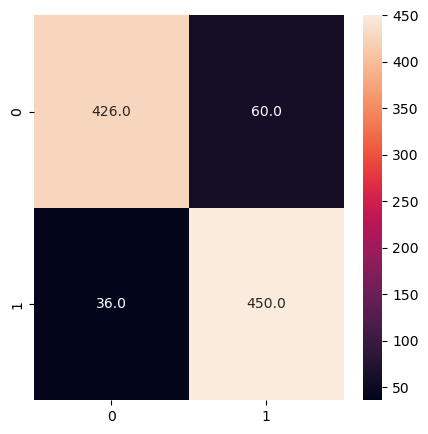


classification report   :::
              precision    recall  f1-score   support

    Positive       0.92      0.88      0.90       486
    Negative       0.88      0.93      0.90       486

    accuracy                           0.90       972
   macro avg       0.90      0.90      0.90       972
weighted avg       0.90      0.90      0.90       972



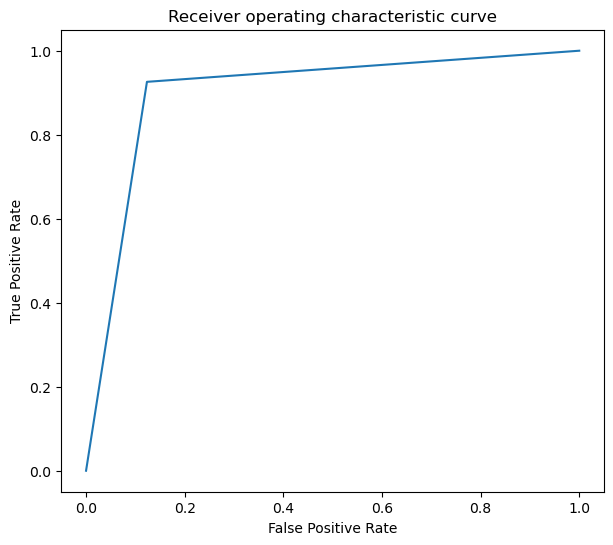

Overall time taken for DecisionTree Classifier ::: 0.0162 min  or  0.9744 sec


In [61]:
#7. Decision Tree Classifier  
print("\n\nDecision Tree Classifier")
print("Please be patient. This may take some time")

models["DecisionTree"] = DecisionTreeClassifier()

#Train Model
print("Train Started")
aaa=time.time()
models["DecisionTree"].fit(X_train_data_new,Y_train_data)
print("Time taken to fit       :::",calcTime(aaa))

#Test Model
x=time.time()
predictions["DecisionTree"] = models["DecisionTree"].predict(x_test_data_new)
print("Time taken to predict   :::",calcTime(x))

#Calculating model accuracy
accuracy["DecisionTree"]=accuracy_score(y_test_data, predictions["DecisionTree"])
print("Accuracy                :::", accuracy["DecisionTree"])

modelAnalyzer("DecisionTree")

print("Overall time taken for DecisionTree Classifier :::",calcTime(aaa))

In [62]:
accuracy.keys()

dict_keys(['SVM', 'RandomForest', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'KNeighbors', 'LogisticRegression', 'DecisionTree'])

In [63]:
predictions

{'SVM': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1,

Classifier Model
1: SVM
2: RandomForest
3: Multinomial Naive Bayes
4: Bernoulli Naive Bayes
5: KNeighbors
6: LogisticRegression
7: DecisionTree
Enter your choice
7
Details are


DecisionTree Classifier
Accuracy                ::: 0.9012345679012346
Confusion matrix        :::
[[426  60]
 [ 36 450]]


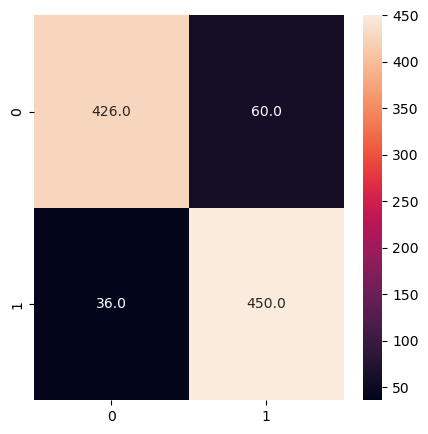


classification report   :::
              precision    recall  f1-score   support

    Positive       0.92      0.88      0.90       486
    Negative       0.88      0.93      0.90       486

    accuracy                           0.90       972
   macro avg       0.90      0.90      0.90       972
weighted avg       0.90      0.90      0.90       972



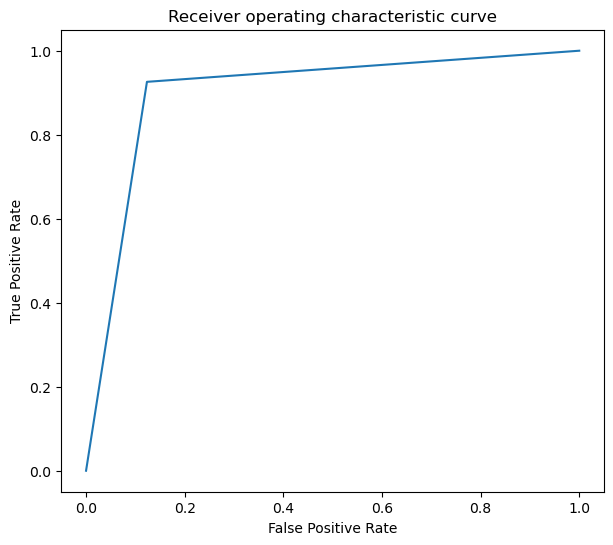

In [64]:
def analyze_each():
    def get_Details(choice): 
        print("Details are")
        modelAnalyzer(list(predictions.keys())[choice-1])
    print("Classifier Model") 
    i=1
    for classifier in predictions.keys():
        print(i,": ",classifier,sep="")
        i+=1
    print("Enter your choice")
    choice=int(input())
    get_Details(choice)
    
analyze_each()

In [65]:
def ensembget(index):
    l=[]
    
    for model in list(["SVM","LogisticRegression","RandomForest","DecisionTree"]):
        l.append(predictions[model][index])

    return statistics.mode(l)

def get_ensemble_accuracy(y_data):

    yhats =[ensembget(xd) for xd in range(len(x_test_data))]
    return accuracy_score(y_data,yhats)

accuracy["Customised"]=get_ensemble_accuracy(y_test_data)
print("Overall Accuracy calculated using mode  :::", accuracy["Customised"])

Overall Accuracy calculated using mode  ::: 0.9681069958847737




Calculating Accuracy of each model


                     Model  Accuracy
0                      SVM  0.960905
1             RandomForest  0.954733
2  Multinomial Naive Bayes  0.958848
3    Bernoulli Naive Bayes  0.959877
4               KNeighbors  0.851852
5       LogisticRegression  0.963992
6             DecisionTree  0.901235
7               Customised  0.968107


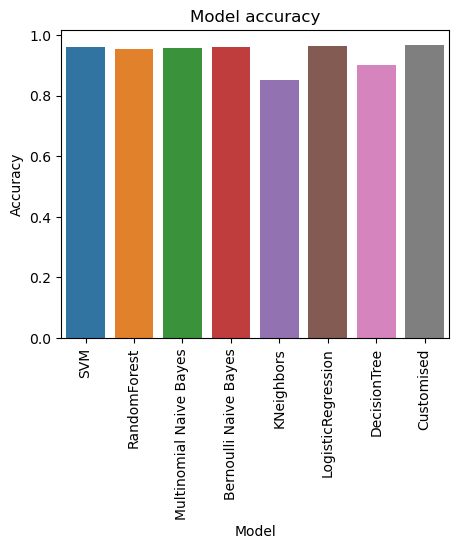

In [66]:
def compare_models():
    
    print("\n\nCalculating Accuracy of each model\n\n")
    
    #Model Accuracy Table    
    result_table=pd.DataFrame(list(accuracy.items()), columns=["Model", "Accuracy"]) 
    #result_table["Accuracy"]=round(result_table["Accuracy"]*100,2)
    print (result_table)
    plt.figure(figsize =(5,4))   #

    sns.barplot(x="Model", y="Accuracy", data =result_table) 
    plt.title("Model accuracy")

    plt.xticks (rotation = 90)  #
    plt.show()


compare_models()


In [67]:
def model_review_output(model): 
    print("\n\nCustomer Review  :::")
    Inp_text=input()

    
    review=filter_text(Inp_text)
    new_test_transform = tfidf_vector.transform([review])

    Out_text="Positive" if models[model].predict(new_test_transform)[0] else "Negative"
    
    print()
    print ("Rating  :::", Out_text)
    print("\n")
model_review_output("DecisionTree")

    
    



Customer Review  :::
NOT GOOD

Rating  ::: Negative




In [72]:
#used as final
def model_review_output(model): 
    print("\n\nCustomer Review  :::")
    Inp_text=input()

    
    review=filter_text(Inp_text)
    new_test_transform = tfidf_vector.transform([review])

    Out_text="Positive" if models[model].predict(new_test_transform)[0] else "Negative"
    
    print()
    print ("Rating  :::", Out_text)
    print("\n")
model_review_output("LogisticRegression")

#FINAL    
    



Customer Review  :::
phone screen guard is not working

Rating  ::: Negative




In [73]:
print("Overall time taken for Sentimental Analysis :::",calcTime(Time_Start))

Overall time taken for Sentimental Analysis ::: 26.3388 min  or  1580.3263 sec
